In [ ]:
!pip install mlflow --quiet
!pip install databricks-cli

In [ ]:
!databricks configure --host https://community.cloud.databricks.com/

In [ ]:
import mlflow
email = ''
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment(f"/Users/{email}/2-entrena-tu-primer-modelo")

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [13]:
# Vamos a cargar un dataset de juguete para mostrar la creación y entrenamiento basado en experimentos
dataset = load_diabetes()

In [14]:
# Vamos a hacer un split rápido del dataset
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

2024/04/16 14:46:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp2ulaf_i7/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
2024/04/16 14:46:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

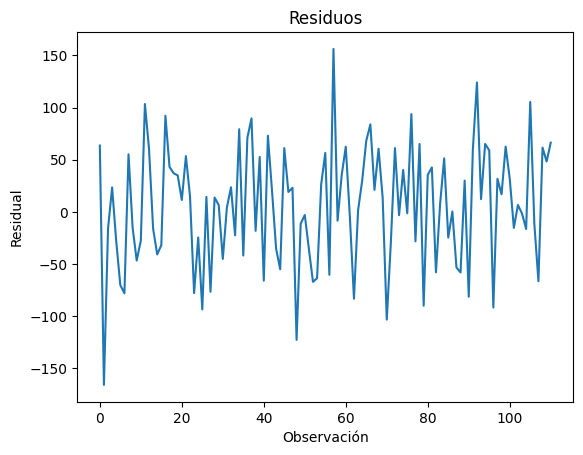

In [15]:
# La forma recomendada de empezar a usar el seguimiento de MLflow con Python es usar la API autolog() de MLflow.
# Con las capacidades de autoregistro de MLflow, una sola línea de código registra automáticamente el modelo resultante, los parámetros usados para crear el modelo y una puntuación del modelo.
mlflow.sklearn.autolog()

# Con autolog() activado, todos los parámetros del modelo, una puntuación del modelo y el modelo ajustado se registran automáticamente.
# También es posible pasar un nombre de ejecución como mlflow.start_run(run_name="Mi increíble ejecución"), de lo contrario, MLflow elegirá uno por nosotros.
with mlflow.start_run():
  # Establecer los parámetros del modelo.
  n_estimators = 100
  max_depth = 6
  max_features = 3

  # Crear y entrenar el modelo.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)

  # Usar el modelo para hacer predicciones en el conjunto de datos de prueba.
  predictions = rf.predict(X_test)

  # Registrar los parámetros del modelo utilizados en esta ejecución.
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)

  # Definir una métrica para evaluar el modelo.
  mse = mean_squared_error(y_test, predictions)

  # Registrar el valor de la métrica de esta ejecución.
  mlflow.log_metric("mse", mse)

  # Convertir los residuos en un dataframe de pandas para aprovechar las capacidades gráficas
  df = pd.DataFrame(data = predictions - y_test)
  # Crear un gráfico de residuos
  plt.plot(df)
  plt.xlabel("Observación")
  plt.ylabel("Residual")
  plt.title("Residuos")

  # Guardar la figura del gráfico
  fig = plt.gcf()
  mlflow.log_figure(fig, "residuals_plot.png")

mlflow.end_run()